<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%94%D0%B5%D1%81%D0%BA%D1%80%D0%B8%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20(%D0%BC%D0%B5%D1%80%D1%8B%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE%2C%20%D0%BC%D0%B5%D1%80%D1%8B%20%D1%80%D0%B0%D0%B7%D0%B1%D1%80%D0%BE%D1%81%D0%B0%2C%20%D0%BA%D0%B2%D0%B0%D0%BD%D0%B8%D0%BB%D1%8C%2C%20%D1%80%D0%B0%D0%B7%D0%BC%D0%B0%D1%85%2C%20%D1%81%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%2C%20%D0%BC%D0%BE%D0%B4%D0%B0%2C%20%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Дескриптивный (описательный) анализ**



In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded=files.upload()

Saving Lesson_2_avocado_sales.csv to Lesson_2_avocado_sales.csv


In [2]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['Lesson_2_avocado_sales.csv']))
display(df.head(2))

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [ ]:
df.isna().sum() # ВЫВЕДЕМ ЕСТЬ ЛИ ПРОПУСКИ

<Axes: xlabel='AveragePrice', ylabel='Count'>

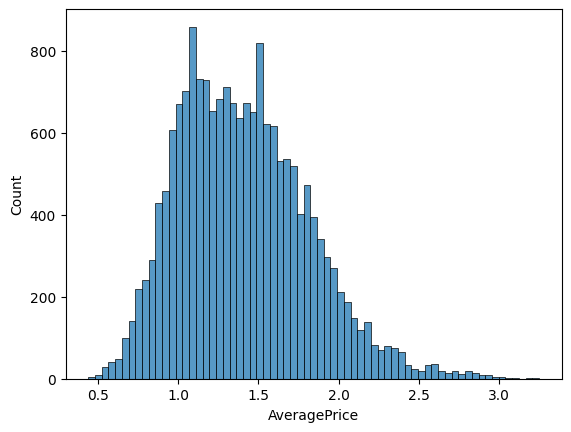

In [5]:
import seaborn as sns               # РАСПРЕДЕЛЕНИЕ ЦЕНЫ
import matplotlib.pyplot as plt     # Большая часть данных распределена в интревале 0,7 и 2
sns.histplot(df, x='AveragePrice')

In [6]:
df.AveragePrice.max()  # МАКС ЦЕНА

3.25

In [7]:
df.AveragePrice.min()  # МИН ЦЕНА

0.44

In [8]:
df.AveragePrice.max()-df.AveragePrice.min()  # РАЗМАХ

2.81

In [10]:
Q1,Q2,Q3=(                              # ОПРЕДЕЛИЛИ КВАНИЛИ 0.25, 0.5, 0.75
   df.AveragePrice.quantile(0.25),      # Результат означает что в 75% случаев цена не превышает 1.66
   df.AveragePrice.quantile(0.5),       # и в 50% случаев цена находится в диапазоне от 1.1 до 1.66
   df.AveragePrice.quantile(0.75)
)
print(Q1,Q2,Q3)

1.1 1.37 1.66


ИНТЕРКВАРТИЛЬНЫЙ РАЗМАХ (чем он больше, тем неоднородее данные)

In [14]:
IQR=Q3-Q1
print(round(IQR,2))

0.56


In [16]:
df.AveragePrice.median(), df.AveragePrice.mean()  # Медианное и среднее значение цены

(1.37, 1.405978409775878)

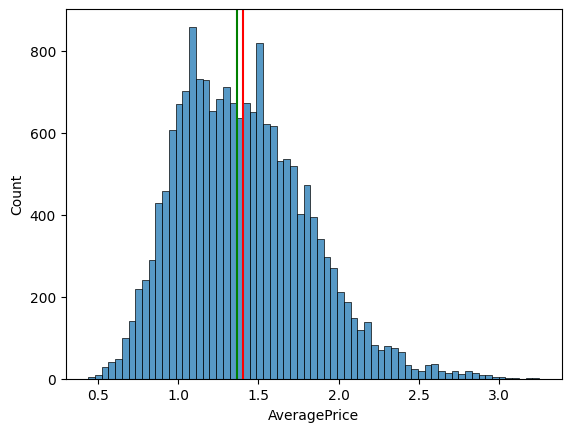

In [18]:
sns.histplot(df, x='AveragePrice')                    # Добавим среднее и медианное значение в гистограмму
plt.axvline(x=df.AveragePrice.mean(), color='red')    # axvline - добавить линию на гистограмму
plt.axvline(x=df.AveragePrice.median(), color='green')

In [23]:
df['Year'], df['Month'],_=df.Date.str.split('-').str # сформируем новые столбцы, укажем, что хотим обработать Date
#                                      методом обработки строк str и разобьем содержимей Date методом split по "-"
df[['AveragePrice','Year','Month']].head(2)          # в конце str чтобы у нас был доступ к методу str и возможность
#                   распаковать развитый столбец через "-". "_" - чтобы Date мы никуда не складываля в наш Датафрейм

,AveragePrice,Year,Month
0,1.33,2015,12
1,1.35,2015,12


In [41]:
df=df.sort_values(by=['Month'])

<Axes: xlabel='Month', ylabel='AveragePrice'>

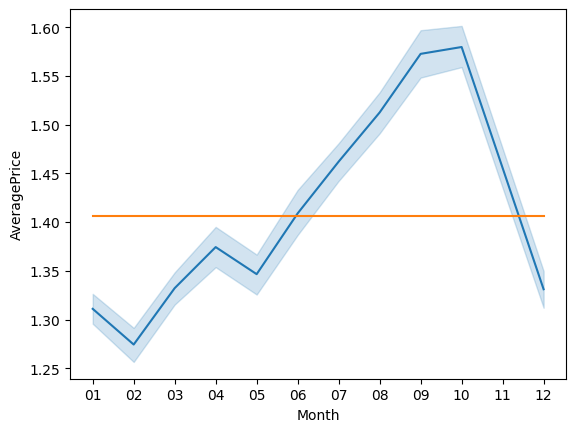

In [42]:
sns.lineplot(data=df, x='Month', y='AveragePrice', sort=True)            # отклонения внутри месяца (по всем годам) заштрихованы
sns.lineplot(x=df.Month.unique(), y=df.AveragePrice.mean(), sort=True)   # Рисуем линейный график средней (приямая)

<Axes: xlabel='Year', ylabel='AveragePrice'>

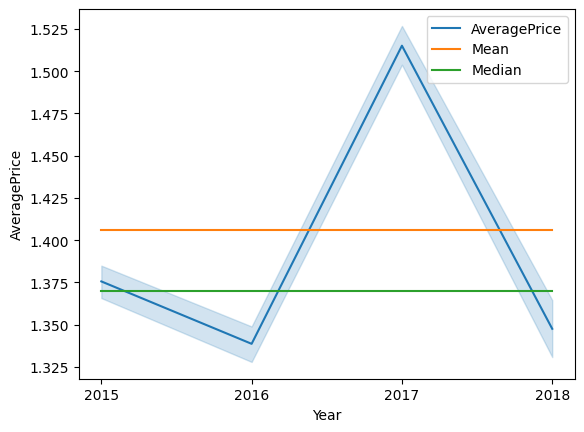

In [31]:
sns.lineplot(data=df, x='Year', y='AveragePrice', label='AveragePrice')      # График по годам. label - название линии для легенды
sns.lineplot(x=df.Year.unique(), y=df.AveragePrice.mean(), label='Mean')
sns.lineplot(x=df.Year.unique(), y=df.AveragePrice.median(), label='Median')

In [32]:
df.AveragePrice.std() # Стандартное отклонение (std)
# ЭТО ЗНАЧИТ, ЧТО ЦЕНА КОЛЕБЛЕТСЯ В РАЙОНЕ 0,4027$. ЗНАЕМ, ЧТО СРЕДНЯЯ ЦЕНА 1,41$
# ВЫВОД: ЦЕНЫ В СРЕДНЕМ НАХОДЯТСЯ В ОТРЕЗКЕ ОТ 1 (1.41-0.4) ДО 1,8 (1.41+0,4)
# ОДНАКО И СРЕДНЯЯ И СТАРНДАРТНОЕ ОТКЛОНЕНИЕ НЕУСТОЙЧИВЫ К ВЫБРОСАМ, Т.К. КВАРТИЛЬ Q3=1.66 Q1=1.1

0.40267655549555065

In [33]:
df.AveragePrice.mode() # Наиболее часто встречающееся значение (МОДА)

0    1.15
Name: AveragePrice, dtype: float64

In [45]:
df.AveragePrice.value_counts().head(5)  # ТОР-5 наиболее часто встречающихся значений в AveragePrice

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
Name: AveragePrice, dtype: int64

In [46]:
df.AveragePrice.describe()  # БАЗОВЫЙ НАБОР ОПИСАНИЯ ВЫБОРКИ (count - размер выборки)

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [47]:
df.AveragePrice.skew()  # КОЭФФИЦИЕНТ АСИММЕТРИИ

0.580302737887842

In [48]:
df.AveragePrice.kurtosis() # КОЭФФИЦИЕНТ ЭКСЦЕССА
#   ИМЕЕМ БОЛЕЕ ОСТЫЙ ПИК, ЧЕМ У НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ (0), ЧТО ГОВОРИТ О НАХОЖДЕНИИ ЦЕН
#   ПРЕИМУЩЕСТВЕННО БЛИЗКИМ К СРЕДНИМ (скоплении значений в центральной зоне)

0.3251958506534347